In [ ]:
!pip install eli5

In [2]:
## load libraries
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from collections import Counter 
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
import pandas as pd 
import numpy as np 
import plotly 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
import eli5

try:
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/kaggle/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

init_notebook_mode(connected=True)

## load data and remove (students, not-employed)
df = pd.read_csv(data_file_prefix + "data/2019Survey/multiple_choice_responses.csv", low_memory = False)
df = df[~df['Q5'].isin(["Student", "Not employed"])]

<div align='center'><font size="5" color='#088a5a'>Is Spending $$$ for MS in Data Science worth it ?</font></div>
<div align='center'><font size="4" color="#088a5a">A detailed comparative analysis of people with and without university degrees for data science</font></div>
<hr>

<p>2019 was an important year for me, Not only I got engaged this year but also I completed my higher education degree. After working for several years in the industry I decided to take a short break, go back to academics and pursue higher education. No doubt, it was one of the best learning experiences I had but there was also a huge investment of time and money. Many people often contact me regularly asking about my experience and viewpoint about such degrees. They ask questions like - <i>whether is it worth spending huge chunks of money for such degrees?</i> Well, there is no fixed answer for such questions because every individual have a different viewpoint and their opinion might be biased. The best way to answer this question is to make use of data, analyse the cohorts of people (example - data scientists) who are well settled in the industry, measure and compare if there are any significant differences in their roles, position, responsibilities, and annual compensation. This type of analysis can provide many interesting insights and help in looking at the broader view of the scenario. In this notebook, I decided to take a stab at this scenario and have shared my experience along with the key insights and a detailed analysis of Kaggle's annual data science survey data. </p>

<img src='https://i.imgur.com/hD44H00.jpg' width=700>
<div align="center"><font size="2">Source: Upslash</font></div>  

<p>There are one set of people who wants to pursue higher education degrees due to their passion and interest. For these people, it makes sense to get enrol in the relevant university courses and pursue their passion. On the other hand, there is another set of people, who wants to obtain these degrees only to get a specific job title, a specific job role, or a position that get them more money. For this set, university degrees are not the only option, there are many alternatives which can also result in the same outcomes. </p>

<p>The most obvious example is in the field of <b>Data Science and Analytics</b>. In recent years, university degrees such as <b>"Masters in Data Science"</b> or <b>"Masters in Analytics"</b> are sought as one of the must-haves to enter into this field. It is not astonishing that Data Scientist is one of the fastest-growing job titles across the globe and the demand for skilled data scientists is increasing. This has given the universities an option to attract students and make immense money. Several universities have started dedicated degree courses specialized in data science and analytics. Those want to become a data scientist or to switch from another profession to data science profession are now strongly considering these university degrees as the only pathway. </p>

But these university courses are not easy to get in and affordable for everyone. These degrees don’t come for free, tuition fees can be exorbitant and can range anything from USD 30,000 to USD 100,000. And that doesn’t include the actual cost of living. Many consider applying for student loans but they add a huge lump sum to the existing mountain of debts. A common myth is that the earning potential for those with postgraduate qualifications is higher but of course, there is no guarantee that one will get a stable job at the end of it. Additionally, Pursuing a university’s higher degree takes anything from one to three years, depending on different factors. This can seem like a long time, especially when the fellow peers are getting started on their careers, while one is still studying. 

The question of interest here is - ** does one need to get that expensive higher education degree**, **do they create a difference from those who do not have university degrees?**. Some resources online also suggest that one can get the depth of knowledge, variety of skills and learn something new. But again, **is it possible to get the same skills, same profile, or even better compensation without such degrees?**.

<img src='https://i.imgur.com/vKFj1mB.png'>

Kaggle conducted their Annual Data Science survey and it was full of interesting questions. Participants of this survey were asked different questions about their demographics, profiles, companies, what they use etc. I analysed this data intending to dig deeper into the profiles of people who completed the university degrees to learn data science and those who did not. The focus of the story in this notebook is to identify if the working data scientists with official higher education degrees differ significantly from the other group. The analysis and storyline are segmented according to different factors.    

*Note* - For the analysis, I removed the respondents who were "students" and "not employed". The two groups were selected based on the respondent's choice if they completed the university degrees to learn data science or not.  

<font color='#088a5a' size=5>Contents</font><br>

<a href="#1">1. Sources of Learning Data Science</a>  
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#11">- Why People Choose Higher Education Degrees</a>   
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#12">- The Academic Landscape : Masters in Data Science Degrees</a>    
<a href="#2">2. Proportion of Individuals with University Degrees</a>  
<a href="#3">3. Are there a Significant Differences - With and Without University Degrees ?</a>   
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#31">3.1 Compensation</a>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#31a">- Key Characteristics : Data Scientists earning > USD 150K</a>   
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#32">3.2 Job Roles</a>   
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#33">3.3 Job Profiles</a>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#33a">- Other Tools : Usage and Comparison</a>   
<a href="#4">4. Identifying Key Traits</a>   
<a href="#5">5. Conclusions</a>   
<a href="#6">6. References</a>   

<div id="#1"></div>
<font color='#088a5a' size=5>1. Sources of Learning Data Science</font><br>            

Data science skills are straightforward to obtain, they need experience and learning. Nowadays there are many online and offline which teaches them in detail. While some prefer online courses such as Coursera or Udacity, some prefer to go to universities for a year or two-year long dedicated courses. Let's look at what are the most popular sources of learning data science among the respondents of the kaggle survey. In this question, one participant could have chosen multiple choices, hence the x-axis represents "percentage" of respondents who selected a particular choice. 

In [3]:
## function to identify value counts of a column responses presented in multiple other columns
def summate_columns(col, xaxis_def=None):
    xaxis, yaxis1 = [], []
    for i in range(1, 20):
        if col+'_Part_'+str(i) not in df:
            break
        
        doc = dict(df[col+'_Part_'+str(i)].value_counts())
        if len(doc) > 0:
            key = list(doc.keys())[0]
        else:
            continue 
        xaxis.append(key)
        
        if key in doc:
            yaxis1.append(doc[key])
        else:
            yaxis1.append(0)
            
    if xaxis_def != None:
        xaxis = xaxis_def
    
    xaxis = xaxis[::-1]
    xaxis = [_.split("(")[0]+"    " for _ in xaxis]
    yaxis1 = [x*100/len(df) for x in yaxis1][::-1]

    temp_df = pd.DataFrame()
    temp_df['xaxis'] = xaxis
    temp_df['yaxis'] = yaxis1
    temp_df = temp_df.sort_values("yaxis")
    temp_df['colors'] = ['#fad46b']*len(temp_df)
    colors = np.array(temp_df['colors'])
    colors[-3], colors[-2], colors[-1] = "#97c6e8", "#97c6e8", "#97c6e8"
    colors[-4] = "red"
    
    annotations = []
    for yd, xd in zip(xaxis, yaxis1):
        annotations.append(dict(xref='x', yref='y',
                            x=xd+2, y=yd,
                            text=str(round(xd, 1)) + '%',
                            font=dict(family='Arial', size=14, color='black'),
                            showarrow=False))
    
    fig = go.Figure(data=[go.Bar(name='', y=temp_df['xaxis'], x=temp_df['yaxis'], orientation='h', marker=dict(color=colors, opacity=0.6))], 
                    layout = go.Layout(title="Sources of Learning Data Science", plot_bgcolor='#fff', paper_bgcolor='#fff', margin=dict(l=100), 
                                       width=900, height=500, legend=dict(orientation="h", x=0.1, y=1.1)))
    fig.update_layout(barmode='group')
    
    annotations += [go.layout.Annotation(x=40, y=9, xref="x", yref="y", text="(Most Popular)", showarrow=False, arrowhead=7, ax=0, ay=-40)]
    
    fig.update_layout(annotations=annotations)
    fig.update_xaxes(showgrid=False, zeroline=False, title="% of respondents")
    fig.update_yaxes(showgrid=False, zeroline=False)
    fig.add_shape(go.layout.Shape(type="rect", xref="x", yref="paper", x0=22, x1=48.6, y0=0.75, y1=1, fillcolor="gray", opacity=0.2, layer="below", line_width=0))
    fig.show()
    
summate_columns("Q13")

- About 44% of the respondents selected **"Coursera"** as the primary source of learning data science. Coursera is the popular online learning platform which provides both free courses and paid specializations.   
- Coursera and its founder [Andrew NG](https://en.wikipedia.org/wiki/Andrew_Ng) have made very significant contributions to the data science revolution. Back in 2012, Andrew NG released the very popular Machine Learning course which became the first choice for many to learn data science. In 2017, **[Deeplearning.ai](https://www.deeplearning.ai/)** was launched and it became very popular data science specialization. These courses and many others from well known academic names on the online platform makes Coursera as the primary choice among the data science enthusiasts. 
- The search results for Coursera data science page says that there are **1054 courses about Data Science** as of Dec 2019.  
<img src='https://i.imgur.com/IItCZ6w.png' width=600 style='border:1px solid #d4d0cf'>


- <a href='https://www.kaggle.com/learn/overview'>Kaggle Learn</a> was selected by almost one-fourth of the respondents. Kaggle team launched these courses somewhere around early 2017. They are composed of notebook style materials which not only focusses on teaching the concepts but also the programming part as well. 
- Then there are other sources such as Udemy, Udacity, edX, fast.ai etc. These platforms als provide online materials and courses to learn data science.  

- Then there is a group of individuals who prefer to go to a university to pursue higher education degrees. Among the survey participants, about **one-fifth of the participants** had completed university degrees. Accoding to multiple sources ( [Masters-And-More](https://www.master-and-more.eu/en/7-reasons-why-you-should-choose-a-masters-degree/), [Uniplaces](https://blog.uniplaces.com/discover/8-good-reasons-apply-masters-degree/), [CareerAdditct](https://www.careeraddict.com/masters-degree-benefits), [MyBaggage](https://www.mybaggage.com/blog/why-do-a-masters-degree-the-pros-and-cons/) ) different individuals have many different reasons to choose university courses over online courses. The most common are:

    - Personal Goal
    - Better Salary
    - Gain More Knowledge
    - Better Job Roles
    - Career Change  

<div id="11"></div>
<font color='#088a5a' size=4>Designing My Own Survey : Why People Choose Higher Education Degrees</font><br>

My personal reason for engaging in a higher education degree was majorly driven by passion and interest, it was a personal goal of mine to get another degree after the bachelors. But I was curious to know why other individuals decide to pursue a higher education degree. I created my own survey to know the student's choices this question and shared it in several groups associated with National University of Singapore. I managed to get about 120 responses from different people for this survey. Following is the response distribution of the Question.

Link of the Survey: [Survey](https://docs.google.com/forms/d/19ov_EmBVdwc70tPUoylm8gPNz2bK4j21UAirDcQHB_Q) (Note : Names are removed to maintain the privacy of the individuals)      
Link of the Responses: [Responses](https://docs.google.com/spreadsheets/d/1lRd2yLNJV6svqllrNDUcZHHYc5X20BswxEhGN89B4i8/edit?usp=sharing)   

In [4]:
d = {
        'Gain More Knowledge': 69.7,
        'Better Job Roles': 34.5,
        'Personal Goal': 26.2,
        'Career Change': 41.8,
        'Better Salary': 43.5,
}

xx = ["Personal Goal", "Better Salary", "Gain More Knowledge", "Better Job Roles", "Career Change"]
xx = [_ + "<br>(" +str(d[_])+ "%)" for _ in xx]
yy = [""]*len(d)
zz = [13.7, 63, 100, 40, 56]
cc = ['red', 'green', 'purple', 'orange', "blue"] 

trace1 = go.Scatter(x = xx, y = [""]*len(d), mode='markers', name="", marker=dict(color=cc, opacity=0.4, size = zz))
layout = go.Layout(barmode='stack', height=300, margin=dict(l=100), title='Reasons for pursuing University Degrees',
                   legend = dict(orientation="h", x=0.1, y=1.15), plot_bgcolor='#fff', paper_bgcolor='#fff', 
                   showlegend=False)

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

- Most of the people decided to pursue higher education degrees to gain more knowledge. This was the primary reason for about 70% of the individuals who were part of this survey.  Every two out of five people decided to pursue university degrees to get better salaries or to change their professions. Only about one-fourth of individuals had their own personal goal to go for a university degree. 
- If we just look at the number of individuals who selected "gain more knowledge", the same but important question arises again: **"Is it worth spending a huge amount of money to gain knowledge that one can get from free sources?"** Arent' the free online sources good enough to gain more knowledge. Or, Can't these sources provide enough skills and knowledge to get that better salary, better job roles, or provide a pathway for a career change.   
- The interesting fact to note that most of the online courses on Coursera, Udemy etc. are also from the same universities or the same professors. Many of them are free as well. So if "gaining more knowledge" is the only goal then it is worth considering these free courses. 

<div id="12"></div>
<font color='#088a5a' size=4>The Academic Landscape : Masters in Data Science Degrees</font><br>

Whatever be the debate but one point is definitely clear, Universities across the globe do benefit a lot from this increased interest in higher education degrees. Many universities have now started specialized masters degree programs in analytics, data science, business analytics etc. The following chart shows some of the popular master's degree programmes from US universities along with their tuition fee and duration. Some of them are provided online, but the same are also provided on campus.  

Source of Data : https://www.kdnuggets.com/2019/04/best-masters-data-science-analytics-online.html

In [5]:
university_data = """CMU Tepper	67575	24
UC Berkeley	66150	20
Georgia Tech	9900	23
Illinois-Urbana	19200	17.5
South California	55886	24
Wisconsin	30600	17.5
Boston Metropolitan	34400	24
Johns Hopkins	53740	17.5
Pennsylvania State	29250	17.5
Northwestern SPS	53148	18
Rutgers	23136	24
UCD Dublin	7575	36
Texas A&M	65000	24
Arizona State	39622	15
Northeastern	34200	24
Ohio	35250	20
Rice	129000	24
Indiana Bloomington	15172	18
Notre Dame	48000	21
IIT Chicago	30985	16
Syracuse	54000	24
California Riverside	24990	13
Iowa State	24000	21
Oregon State	23445	17.5
Missouri	34000	24
CUNY SPS	13200	17.5
American	54186	15
Oklahoma	26103	14
Colorado	39450	24
Oklahoma State	33990	24
Baker College	17100	17.5
Bay Path	29340	24
Bellevue	20700	17.5
Blanchardstown	2320	24
Capella	33360	12
Central Connecticut	21681	17.5
Colorado Technical	28080	24
DePaul	43160	17.5
DS TechInstitute	7900	9
Dakota State	13320	10
Elmhurst College	25350	24
Full Sail	28008	12
La Salle	26250	20
Lewis	26235	24
Maryville St. Louis	22950	17.5
Phoenix	29316	17.5
Regis	25560	17.5
Saint Mary's College	31946	24
South Dakota State	13320	12
Saint Joseph's	17520	24
Southern Methodist	57084	28
Southern New Hampshire	22572	15
Slippery Rock	16269	10
Alabama Huntsville	21810	12
Maryland College	24984	17.5
Villanova	43400	24
West Virginia	30690	17.5
Northcentral	30530	23
Edinburgh Napier	9060	33
Drexel	56925	24
Merrimack College	28320	16
Varna Free	5391	12
Johnson & Wales	23744	24
Kent State	21524	12"""

university_data = university_data.split("\n")
udf = pd.DataFrame()
udf['name'] = [_.split("	")[0] for _ in university_data]
udf['tution'] = [float(_.split("	")[1]) for _ in university_data]
udf['months'] = [float(_.split("	")[2]) for _ in university_data]

udf1 = udf[udf['months'] > 6]
udf1 = udf1[udf1['months'] < 25]
udf1 = udf1[udf1['tution'] < 100000]
udf1['name1'] = udf1.apply(lambda x : "" if x['months'] in [9, 12, 17.5, 24] else x['name'], axis = 1)

fig = go.Figure([go.Bar(x=udf['name'], y=udf['tution'], orientation="v", name="Tution Fee", marker=dict(color="orange", opacity=0.5), ),
                 go.Scatter(x=udf['name'], name="Median Household Income", y=[59000]*len(udf), mode="lines", marker=dict(color="red"), line=dict(dash='dash')) ])
fig.update_layout(title="Tution Fee : University Degrees in Data Science", plot_bgcolor='#fff', paper_bgcolor='#fff', legend=dict(orientation="h", x=0.1, y=1.1), 
                 xaxis = dict(tickangle = 45), height=500)
fig.show()

fig = go.Figure([go.Bar(x=udf['name'], y=udf['months'], orientation="v", marker=dict(color="#3498d5", opacity=0.5, line=dict(color="#3498d5")), name="Duration"),
                 go.Scatter(x=udf['name'], y=[12]*len(udf), mode="lines", marker=dict(color="red"), line=dict(dash='dash'), name="1 Yr"), 
                 go.Scatter(x=udf['name'], y=[18]*len(udf), mode="lines", marker=dict(color="blue"), line=dict(dash='dash'), name="1.5 Yr"), 
                 go.Scatter(x=udf['name'], y=[24]*len(udf), mode="lines", marker=dict(color="orange"), line=dict(dash='dash'), name="2 Yr"), 
                ])
fig.update_layout(title="Duration : University Degrees in Data Science", plot_bgcolor='#fff', paper_bgcolor='#fff', legend=dict(orientation="h", x=0.1, y=1.1),
                   xaxis = dict(tickangle = 45), height=400)
fig.show()

Time and money are the two biggest investments associated with university degrees. The graph shows that the tuition fee for most of these courses is not cheap and the duration can range from anywhere 1 to 3 years depending upon specialization, location, and university type. 

The university courses are of two types: Generic courses and Specializations. Generic courses are typically very comprehensive, they cover all parts of data science but they are not very deep and detailed. These type of courses are good for those who want to get acquainted with main elements of this field. The specializations, on the other hand, aim to cover every possible detail of one particular area. They are generally very deep. For both types of courses, the investment of money and time are always higher as compared to the alternative free ones.  Additionally, these courses are never meant to teach everything and do the spoon-feeding. They are more like the guided paths, and it is mostly the self-effort along that path which makes the students learn. If guided correctly, even through the non-degree courses (such as the ones on coursera or kaggle learn etc), one may also get the same outcomes.

Head of Data Science from Restaurant Technologies, Inc. [shared](https://www.kdnuggets.com/2014/06/masters-degree-become-data-scientist.html), "No single Masters Program could cover all the disciplines needed in significant depth for one to be an expert in all these areas. Selecting an area or two or three and having depth and expertise in those is common. Many companies do not have just a "Data Scientist" but teams comprised of experts from the different disciplines."   

<div id="2"></div>
<font color='#088a5a' size=5>2. Proportion of Individuals with University Degrees</font><br>   

Let's look at what per cent of individuals completed their university degrees to become a data scientist across different countries. Respondents were asked about their country in one of the questions. 

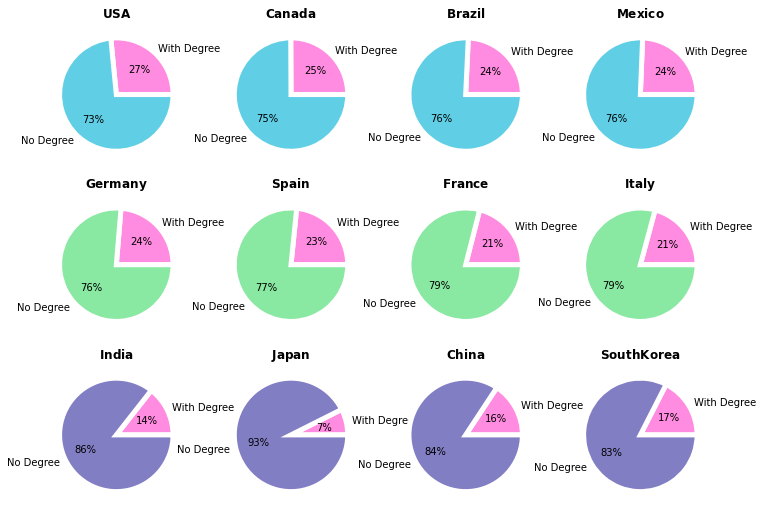

In [6]:
key1 = "University Courses (resulting in a university degree)"
df1 = df[df['Q13_Part_10'] == key1]
df2 = df[df['Q13_Part_10'] != key1]

nations = ["United States of America", "Canada", "Brazil", "Mexico", 
           "Germany", "Spain", "France", "Italy", 
           "India", "Japan", "China", "South Korea"]
nation_map = {"United States of America" : "USA", "United Kingdom of Great Britain and Northern Ireland" : "UK"}
plt.figure(figsize=(12,12))

vals = []
for j in range(len(nations)):
    country = nations[j]
    country_df = df[df['Q3'] == country]
    ddf1 = country_df[country_df['Q13_Part_10'] == key1]
    ddf2 = country_df[country_df['Q13_Part_10'] != key1]
    plt.subplot(4, 4, j+1)
    
    if j < 4:
        colors = ["#ff8ce0", "#60cfe6"]
    elif j < 8:
        colors = ["#ff8ce0", "#89e8a2"]
    else:
        colors = ["#ff8ce0", "#827ec4"]
    
    vals.append(len(ddf1) / (len(ddf1) + len(ddf2)))    
    plt.pie([len(ddf1), len(ddf2)],
            labels=["With Degree", "No Degree"],
            autopct="%1.0f%%", 
            colors=colors,
            wedgeprops={"linewidth":5,"edgecolor":"white"})
    if country in nation_map:
        country = nation_map[country]
    plt.title(r"$\bf{" + country + "}$")

- In the American continent, the USA and Canada are the two most sought places to pursue higher education degrees. About **one-fourth of the respondents** from these countries have completed their university degrees to becoming a data scientist. In the United States, about 27% of the individuals who were part of this survey completed their university degrees. In Europe, there are about one-fifth of respondents who completed their university degrees while in Asia, the percentage is a bit lower only about 15%.  
- Countries with the highest proportion of data scientists with university degrees are **'Tunisia', 'Austria', 'New Zealand' and 'Greece'** with **over 40% of the individuals** completing university degrees. On the other hand, countries **'Japan', 'Nigeria', 'Belarus', and 'Algeria'** shows a lower number (less than 10%) of individuals completing university degrees.   
- Among the genders, female respondents have a higher number for completing university degrees than male respondents. **23% of the female respondents** and 20% of the male respondents completed their university degrees.    

<div id="3"></div>
<font color='#088a5a' size=5>3. Are there Significant Differences - With or Without University Degrees ?</font><br> 

According to Forbes, Most people with data science job titles don’t have these new degrees. I also looked at the profiles of a few data scientist in my Linkedin Network and observed that not all of them have data science degrees. People tend to take different paths - some have degrees in business, economics, maths etc, while some have specialed data science degrees, and some have no university degree. But all of them are working in good organizations with good job roles. In the next section, let's look at the key insights from the Survey Data Analysis. The focus of the analysis is to compare the two groups -  individuals who completed university degree vs those without for becoming a data scientist and identify key differences (if any).

Mainly, We will look at three perspectives: Are there a fairly equal percentage of individuals from two groups:

1. With every compensation bracket.   
2. For each type of job role or activity.   
3. For each type of activity, they do daily.   

<div id="31"></div>
<font color='#088a5a' size=5>3.1 Compensation </font><br> 

In [7]:
col_yes = "#fad46b"
col_no = "#97c6e8"

def compute_stats(df, col, xaxis=None):
    agg_df = df[col].value_counts().to_frame()
    total = sum(agg_df[col])
    agg_df['percent'] = agg_df[col].apply(lambda x : 100*x / total)
    agg_df = agg_df.reset_index().rename(columns = {col: "count", 'index' : col})
    agg_doc = {}
    if xaxis != None:
        for _ in xaxis:
            try:
                agg_doc[_] = agg_df[agg_df[col] == _]['percent'].iloc(0)[0]
            except:
                agg_doc[_] = 0
    return agg_doc

def plot_ver_bars(c, ht=500, annot = True):
    dxf1 = df1[df1['Q5'].isin(["Data Scientist"])]
    dxf2 = df2[df2['Q5'].isin(["Data Scientist"])]

    count_df1 = dxf1[dxf1["Q3"].isin([c])]
    count_df2 = dxf2[dxf2["Q3"].isin([c])]
    col = "Q10"
    xaxis = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-500,000", "> $500,000"]
    t1_doc = compute_stats(count_df1, col, xaxis=xaxis)
    t2_doc = compute_stats(count_df2, col, xaxis=xaxis)

    ## plot the bar chart
    xaxis1 = ["$0K", "1 - 1K", "2 - 2K", "3 - 3K", "4 - 4K", "5 - 7.5K", "7.5 - 10K", "10 - 15K", "15 - 20K", "20 - 25K", "25 - 30K", "30 - 40K", "40 - 50K", "50 - 60K", "60 - 70K", "70 - 80K", "80 - 90K", "90 - 100K", "100 - 125K", "125 - 150K", "150 - 200K", "200 - 250K", "250 - 300K", "300 - 500K", "> $500K"]
    fig = go.Figure(data=[
                go.Bar(name='Without University Degree', x=xaxis1[7:], y=[t2_doc[_] for _ in xaxis][7:], marker=dict(color=col_no, opacity=0.8)),
                go.Bar(name='With University Degree', x=xaxis1[7:], y=[t1_doc[_] for _ in xaxis][7:], marker=dict(color=col_yes, opacity=0.8))])
    fig.update_layout(barmode='group', title="Data Scientists in <b>"+c+"</b>", 
                      yaxis = dict(title="% of respondents"), xaxis = dict(title="US$"), height=ht,
                      legend=dict(orientation="h", x=0.01, y=1.1), plot_bgcolor='#fff', paper_bgcolor='#fff')
                                 
    fig.update_xaxes(showgrid=False, zeroline=False)
    fig.update_yaxes(showgrid=False, zeroline=False)
    if annot == True:
        fig.update_layout(annotations=[go.layout.Annotation(x=15.5, y=13, xref="x", yref="y", 
                                                       text="More % of Individuals <br> Without University Degrees <br>Earning > $150K", 
                                                       showarrow=True, arrowhead=7, ax=0, ay=-40), 
                                 go.layout.Annotation(x=11, y=24, xref="x", yref="y", 
                                                       text="With University Degrees <br> Earning More", 
                                                       showarrow=True, arrowhead=7, ax=0, ay=-40)])
        fig.add_shape(go.layout.Shape(
                    type="rect",
                    xref="x",
                    yref="paper",
                    x0=12.5,
                    x1=17.5,
                    y0=0.03,
                    y1=1,
                    fillcolor="red",
                    opacity=0.1,
                    layer="below",
                    line_width=0))
        fig.add_shape(go.layout.Shape(
                    type="rect",
                    xref="x",
                    yref="paper",
                    x0=10.5,
                    x1=12.4,
                    y0=0.5,
                    y1=1,
                    fillcolor="green",
                    opacity=0.1,
                    layer="below",
                    line_width=0))
    
    
    fig.show()
    return count_df1, count_df2

nations = ["United States of America", "Germany"]
c1, c2 = plot_ver_bars(nations[0])

The plot shows the percentage of respondents from the United States of America in each compensation bracket. Looking at every bucket, it is clear that there are no significant differences between the two groups. Approximately they differ by a few per cent (less than 5). However, a few sections in this chart are very interesting. 

- A common belief about university degrees is that one get higher compensation. The chart shows that there is a large percentage of individuals **without a university degree also earning more than 100K USD**. Even without university degrees, if individuals manage to obtain the right skills and the right direction, one can also grab high compensation. That's where Kaggle Learn or Coursera are the best options. As they provide the pathway to get the appropriate skills required to become a data scientist.
- There are slight differences when the compensation is less than 125K. For this range, there is a higher percentage of individuals having university degrees. The area is shown in the green section in the chart. Well, this compensation range is the average of most of the companies in USA. This means that university degrees in data science can give an initial boost to the candidates in the compensation.  
- Very Interesting to note that there are more percentage of respondents without university degrees than those who have who are earning in the range of USD 150K-300K. This area is highlighted in red. This implies that there are definately ways to get higher compensation not necessarily after obtaining a masters in data science degree. The obvious reasons can be the amount of experience, age group, or special talent. It will be interesting to specifically look into this cohort where data scientists earn >150K USD. This is analysed in the next section.

<div id="31a"></div>
<font color='#088a5a' size=4>Key Characteristics : Data Scientists earning > $150K </font><br> 

The following graph shows the key characteristics: age distribution, coding experience (in years) etc. for Data Scientist earning more than 150K USD. 

In [8]:
salaries = ["100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", "300,000-500,000"]
group1 = c1[c1["Q10"].isin(salaries)]
group2 = c2[c2["Q10"].isin(salaries)]

vc1 = group1['Q15'].value_counts().to_frame().reset_index()
vc1['percent'] = vc1['Q15'].apply(lambda x : 100*x / sum(vc1['Q15']))

vc2 = group2['Q15'].value_counts().to_frame().reset_index()
vc2['percent'] = vc2['Q15'].apply(lambda x : 100*x / sum(vc2['Q15']))

order = ["< 1 years", "1-2 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"]
doc1, doc2 = {}, {}
for _, r in vc1.iterrows():
    doc1[r['index']] = r['percent']
for _, r in vc2.iterrows():
    doc2[r['index']] = r['percent']

trace1 = go.Bar(x=order, y=[doc1[_] for _ in order], name="", orientation="v", marker=dict(color=col_yes, opacity=0.8))
trace2 = go.Bar(x=order, y=[doc2[_] for _ in order], name="", orientation="v", marker=dict(color=col_no, opacity=0.8))

vc1 = group1['Q1'].value_counts().to_frame().reset_index()
vc1['percent'] = vc1['Q1'].apply(lambda x : 100*x / sum(vc1['Q1']))

vc2 = group2['Q1'].value_counts().to_frame().reset_index()
vc2['percent'] = vc2['Q1'].apply(lambda x : 100*x / sum(vc2['Q1']))

order = ['22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
doc1, doc2 = {}, {}
for _, r in vc1.iterrows():
    doc1[r['index']] = r['percent']
for _, r in vc2.iterrows():
    doc2[r['index']] = r['percent']

trace3 = go.Scatter(x=order, y=[doc1[_] for _ in order], name="", mode="lines+markers", marker=dict(color=col_yes, opacity=0.8))
trace4 = go.Scatter(x=order, y=[doc2[_] for _ in order], name="", mode="lines+markers", marker=dict(color=col_no, opacity=0.8))


### ML Exp 

vc1 = group1['Q23'].value_counts().to_frame().reset_index()
vc1['percent'] = vc1['Q23'].apply(lambda x : 100*x / sum(vc1['Q23']))

vc2 = group2['Q23'].value_counts().to_frame().reset_index()
vc2['percent'] = vc2['Q23'].apply(lambda x : 100*x / sum(vc2['Q23']))

order = ['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-15 years', '15-20 years', '20+ years']
doc1, doc2 = {}, {}
for _, r in vc1.iterrows():
    doc1[r['index']] = r['percent']
for _, r in vc2.iterrows():
    doc2[r['index']] = r['percent']

trace5 = go.Bar(x=order, y=[doc1[_] if _ in doc1 else 0 for _ in order], name="With University Degree", orientation="v", marker=dict(color=col_yes, opacity=0.8))
trace6 = go.Bar(x=order, y=[doc2[_] if _ in doc1 else 0 for _ in order], name="Without University Degree", orientation="v", marker=dict(color=col_no, opacity=0.8))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Machine Learning Experience (In Years)", "Coding Experience (In Years)"))
fig.add_trace(trace6, 1, 1)
fig.add_trace(trace5, 1, 1)
fig.add_trace(trace2, 1, 2)
fig.add_trace(trace1, 1, 2)
# fig.add_trace(trace4, 2, 1)
# fig.add_trace(trace3, 2, 1)
fig.update_layout(height=450, title="Data Scientists in USA earning >150K USD : Key Characteristics", plot_bgcolor='#fff', paper_bgcolor='#fff',
                  yaxis = dict(title="% of respondents"), yaxis3 = dict(title="% of respondents"), legend=dict(orientation="h", x=0.1, y=1.2))
fig.show()

fig = go.Figure(data=[trace4, trace3])
fig.update_layout(barmode='group', title="Age : Data Scientists earning >150K USD", showlegend=False, 
                  yaxis = dict(title="% of respondents"), xaxis = dict(title="US$"), height=350,
                  plot_bgcolor='#fff', paper_bgcolor='#fff')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_layout(annotations=[go.layout.Annotation(x=6, y=7.6, xref="x", yref="y", 
                                               text="Experienced people may not<br>need to get university degrees<br>in Data Science to earn more", 
                                               showarrow=True, arrowhead=7, ax=0, ay=-40)]) 
fig.show()

- The chart shows that there is a considerable number of individuals in each bracket of the machine learning experience, coding experience, and age. The charts are also does not shows any skewness in a particular bracket. 
- With more number of years in experience for coding and machine learning (greater than 5), We see that relatively a higher percentage of people are there earning more than 150K without university degrees.   
- More number of individuals who are aged less than 34 years and with a university degree earn greater than 150K. Good to see that even more percentage of young individuals, aged 22-24 also get higher compensation in the USA.  
- The portion on the right side of the age graph shows that experienced people may not need to get university degrees in data science if they are only looking for better salaries.  
- These trends are also similar in other countries. According to [many](https://www.mastersportal.com/articles/2608/top-9-countries-with-the-highest-investments-in-university-education.html) links, top countries for higher education university degrees are the USA, Germany, Canadas etc. 

In [9]:
_, _ = plot_ver_bars("Canada", ht=300, annot = False)
_, _ = plot_ver_bars("Germany", ht=300, annot = False)

- We see similar insights for these countries as the USA where more percentage of non degree holder respondents are earning higher compensation in many brackets. 

<div id="32"></div>
<font color='#088a5a' size=5>3.2 Job Roles </font><br> 

Next we look at the job roles of individuals. Does it make a difference in terms of what kind of activity the data scientists do on the daily basis if they are coming with a university degree as compared to without. 

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
def diff_workroles(col, xaxis_def=None, get=False, sum_choices = False):
    xaxis, yaxis1, yaxis2 = [], [], []
    for i in range(1, 20):
        if col+'_Part_'+str(i) not in df1:
            break
            
        c1 = df1[df1["Q3"].isin(["United States of America"])]
        c2 = df2[df2["Q3"].isin(["United States of America"])]

        c1 = c1[c1['Q5'].isin(["Data Scientist"])]
        c2 = c2[c2['Q5'].isin(["Data Scientist"])]
        
        doc1 = dict(c1[col+'_Part_'+str(i)].value_counts())
        doc2 = dict(c2[col+'_Part_'+str(i)].value_counts())

        if len(doc1) > 0:
            key = list(doc1.keys())[0]
        elif len(doc2) > 0:
            key = list(doc2.keys())[0]
        else:
            continue 
        xaxis.append(key)
        
        if key in doc1:
            yaxis1.append(doc1[key])
        else:
            yaxis1.append(0)
        if key in doc2:
            yaxis2.append(doc2[key])
        else:
            yaxis2.append(0)
            
    if xaxis_def != None:
        xaxis = xaxis_def
    
    
    xaxis = xaxis[::-1]
    
    ln_c1 = len(c1)
    ln_c2 = len(c2)
    if sum_choices == True:
        ln_c1 = sum(yaxis1)
        ln_c2 = sum(yaxis2)
    
    yaxis1 = [x*100/ln_c1 for x in yaxis1][::-1]
    yaxis2 = [x*100/ln_c2 for x in yaxis2][::-1]
    if get == True:
        return xaxis, yaxis1, yaxis2
    
    tra1 = go.Bar(name='With Degree', y=xaxis, x=yaxis1, orientation='h', width=0.3, marker=dict(color=col_yes, opacity=0.8))
    tra2 = go.Bar(name='Without Degree', y=xaxis, x=yaxis2, orientation='h', width=0.3, marker=dict(color=col_no, opacity=0.8))
    return tra1, tra2

xaxis = ["Data Analysis / Exploration    ",
         "Build/Run Data Infrastructure    ",
         "Build Machine Learning Prototypes    ",
         "Build Machine Learning Services    ",
         "Experimentation and Improvements    ",
         "Research / SOTA Models    ",
         "None of these activities    ",
         "Other"]

x, y1, y2 = diff_workroles("Q9", xaxis, get=True)
trace1 = go.Bar(name='With Degree', y=x[2:], x=y1[2:], orientation='h', width=0.3, marker=dict(color=col_yes, opacity=0.8))
trace2 = go.Bar(name='Without Degree', y=x[2:], x=y2[2:], orientation='h', width=0.3, marker=dict(color=col_no, opacity=0.8))

x, y1, y2 = diff_workroles("Q9", xaxis, sum_choices = True, get=True)
trace5 = go.Bar(name='', y=x[2:], x=y1[2:], orientation='h', width=0.3, marker=dict(color=col_yes, opacity=0.5))
trace6 = go.Bar(name='', y=x[2:], x=y2[2:], orientation='h', width=0.3, marker=dict(color=col_no, opacity=0.5))


def summate(row, cols):
    count = 0
    for c in cols:
        if str(row[c]) == "nan":
            continue
        count += 1
    return count

def skill_variety(col, df):
    dfx = df[df["Q3"].isin(["United States of America"])]

    cols = []
    for i in range(1, 20):
        if col+'_Part_'+str(i) not in df:
            break
        doc = dict(dfx[col+'_Part_'+str(i)].value_counts())
        if any(_ in doc for _ in ["None of these activities are an important part of my role at work", "Other"]):
            continue
        cols.append(col+'_Part_'+str(i))            
    dfx[col+'_sum'] = dfx.apply(lambda x : summate(x, cols), axis=1)
    return dfx

order = [0,1,2,3,4,5,6]
doc1, doc2 = {}, {}
c1 = skill_variety("Q9", df1)
vc1 = c1['Q9_sum'].value_counts().to_frame().reset_index()
vc1['percent'] = vc1['Q9_sum'].apply(lambda x : 100*x / len(c1))
for _, r in vc1.iterrows():
    doc1[r['index']] = r['percent']

c2 = skill_variety("Q9", df2)
vc2 = c2['Q9_sum'].value_counts().to_frame().reset_index()
vc2['percent'] = vc2['Q9_sum'].apply(lambda x : 100*x / len(c2))
for _, r in vc2.iterrows():
    doc2[r['index']] = r['percent']

trace3 = go.Scatter(x=order, y=[doc1[_] for _ in order], name="With University Degrees", mode="markers+lines", marker=dict(color=col_yes, opacity=0.8))
trace4 = go.Scatter(x=order, y=[doc2[_] for _ in order], name="Without University Degrees", mode="markers+lines", marker=dict(color=col_no, opacity=0.8))

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("A: % of respondents <br> with different responsibilities", 
                                    "B: % of times a <br> responsibility is selected"))
fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 1, 1)
fig.add_trace(trace5, 1, 2)
fig.add_trace(trace6, 1, 2)
fig.update_layout(title="", plot_bgcolor='#fff', paper_bgcolor='#fff',
                  xaxis1 = dict(title="% of respondents"), 
                  xaxis2 = dict(title="% this responsibility is choosen"), yaxis2 = dict(showticklabels=False),
                  legend=dict(orientation="h", x=0.1, y=1.2))
fig.show()

The two plots capture two different pieces of information: 
- Plot A shows what percentage of respondents selected a particular activity which people do in their day to day activities. This plot shows which are the most common activities people do in their data science project and the difference between a degree and non-degree holders. 
- Plot B shows, out of all the selected choices by all the respondents, what percentage is a particular responsibility is selected. This plot shows, for a particular group (degree or non-degree holders), which activity has more importance. For example, If a particular 'responsibility' is rarely selected, then the overall percentage will be smaller and If it is selected most of the times, then its overall percentage will also be higher. Meaning that it will be important to the particular group - degree or non-degree holders. 

From these two plots, we can observe that:

- Plot A shows that a higher percentage of individuals with a university degree are involved in different tasks. The biggest differences are observed for data scientists who do "Data Analysis or Exploration", and performing "Research and developing State of the art models". Since experimentation is always a big part of any data science project, there exists very less differences in the % of respondents of two groups.     
- The percentage of non-degree holder respondents is always lesser than the counterpart, however, the differences are not extreme. There is still a significant percentage of people who are involved in similar responsibilities as the university holders. Hence, it will be wrong to say that only university holders do a particular type of activities or have specialized activities.   
- Plot B shows a higher percentage of people with university degrees selected being involved in **Research work, Data Analysis, and Building/Running Infrastructures**. While a slightly more percentage of people without university degrees selected being involved in Experimentation and Building Machine Learning services.  
- A fairly equal percentage is observed for people who build Machine Learning service despite their degrees. This particular selection shows that there is no major difference in the kind of work a data scientist will do.   

In [11]:
fig = go.Figure([trace3, trace4])
fig.update_layout(title="Number of responsibilities of Data Scientists", plot_bgcolor='#fff', paper_bgcolor='#fff', height=500,
                  yaxis = dict(title="% of respondents", showgrid=False),xaxis = dict(title="Number of job responsibilities",showgrid=False), 
                  legend=dict(orientation="h", x=0.6, y=1.2))
fig.update_layout(annotations=[go.layout.Annotation(x=1, y=13, xref="x", yref="y", 
                                               text="Specialists : Involved in <br> only one activity", 
                                               showarrow=True, arrowhead=3, ax=0, ay=-60), 
                         go.layout.Annotation(x=6, y=10, xref="x", yref="y", 
                                               text="Generalists : Involved in <br> every activity", 
                                               showarrow=True, arrowhead=3, ax=0, ay=-60)])
fig.add_shape(go.layout.Shape(type="circle", xref="x", yref="paper", x0=0.8, x1=1.23, y0=0.1, y1=0.3, fillcolor="PaleTurquoise", opacity=0.7, layer='below', line_color="#34eb71", line_width=2))
fig.add_shape(go.layout.Shape(type="circle", xref="x", yref="paper", x0=6.2, x1=5.8, y0=0.01, y1=0.2, fillcolor="PaleTurquoise", opacity=0.7, layer='below', line_color="#34eb71", line_width=2))
fig.show()

- Based on the number of job responsibilities, a data scientist can be classified into two categories - Generalist and Specialist. Generalist are the individuals involved in all parts of life cycle of a data science project (ie. the points on the extereme right). Specialists are the individuals who are focussed on hardly 1 or 2 job responsibilities, ie. (points in the left). 
- We see that slightly more percentage of generalists are there having university degrees. They are they people who are involved in every step - doing analysis, experimentation, building services, and also research. In general, the plot shows that more percentage of people who completed university degrees are involved in multiple responsibilities. 

<div id="33"></div>
<font color='#088a5a' size=5>3.3 Job Profiles - What type of tools/techniques are used ?</font><br> 

Another important point in the set of common beliefs is that the job profile of those who completed their university degrees is very different from those who did not. Mainly the differences are considered in terms of tools, technologies, techniques used on day to day basis. Let's analyse from the kaggle survey data and identify are there really major differences in what type of tools and techniques are used by people with or without university degrees (or self made data scientists as compared to those who obtained university degrees). 

In [12]:
def generate_bubb_diff(col, title):
    # x, y1, y2 = diff_workroles("Q9", xaxis, sum_choices = True, get=True)
    x, y1, y2 = diff_workroles(col, get = True, sum_choices = True)
    
    x = [_.split("(")[0].strip() for _ in x]
    x = x[2:]
    y1 = y1[2:]
    y2 = y2[2:]

    ss1 = y1 + y2 + [np.abs(a-b) for a,b in zip(y1, y2)]
    ss1 = [str(round(_, 1))+"%" for _ in y1+y2] + [round(a-b, 2) for a,b in zip(y1, y2)]
    
    diffs1, diffs2 = [], []
    for i in range(len(y1)):
        d = y1[i] - y2[i]
        if d > 0:
            diffs1.append(2.5+d)
            diffs2.append(3)
        else:
            diffs2.append(2.5-d)
            diffs1.append(3)
    ss = [_*diffs1[i] for i, _ in enumerate(y1)]
    ss += [_*diffs2[i] for i, _ in enumerate(y2)]
    ss += [np.abs(a-b)*10 for a,b in zip(y1, y2)]
    
    trace1 = go.Scatter(x = ["University Degree Holders"]*len(x)+["Self Made"]*len(x)+["Difference"]*len(x), y = x+x+x, mode='markers+text', textposition="middle right", text=ss1, name="", 
                        marker=dict(color=[col_yes]*len(x)+[col_no]*len(x), opacity=0.8, size = ss))
    layout = go.Layout(barmode='stack', margin=dict(l=200), height=900, title=title,
                       legend = dict(orientation="h", x=0.1, y=1.15), plot_bgcolor='#fff', paper_bgcolor='#fff', 
                       showlegend=False)

    fig = go.Figure(data=[trace1], layout=layout)
    iplot(fig)
    
generate_bubb_diff("Q24", title = "Do self made data scientists use different Machine Learning Models ?")
generate_bubb_diff("Q28", "Is there a difference in tools / techniques used by data scientists")

- In terms of machine learning models and techniques, a higher percentage of university degree holders use deep learning approaches. This include **Bayesian approaches, General adversarial networks, and neural networks**. This is likely because of the recent interest and developments in deep learning, universities have also added courses with a lot of focus on deep learning. There are specialized courses on neural networks, deep learning, and even GANs. However, it is worth mentioning here that the cost of the specialized courses is relatively higher than the other courses due to extra credits. If anyone wants to just learn these skills, one can obtain them from resources available on the internet.     
- A slightly higher percentage of individuals without university degrees use simple linear models such as logistic regression models. This is because in most of the companies, data science projects always start with simple models and they tend to work very well. 
- In terms of specific machine learning models, the two groups do not show any major differences. This is likely because everyone who starts with data science, they at least try to get a taste of different machine learning libraries and techniques. 

In [13]:
c1 = skill_variety("Q24", df1)
c2 = skill_variety("Q24", df2)

vc1 = c1['Q24_sum'].value_counts().to_frame().reset_index()
vc2 = c2['Q24_sum'].value_counts().to_frame().reset_index()

vc1['percent'] = vc1['Q24_sum'].apply(lambda x : 100*x / len(c1))
vc2['percent'] = vc2['Q24_sum'].apply(lambda x : 100*x / len(c2))

vc1 = vc1.sort_values("index")[1:]
vc2 = vc2.sort_values("index")[1:]

tr1 = go.Scatter(x=vc1['index'], y=vc1['percent'], name='with',fill='tozeroy', marker=dict(color=col_yes),showlegend=False, opacity=0.8)
tr2 = go.Scatter(x=vc2['index'], y=vc2['percent'], name='without',fill='tozeroy', marker=dict(color=col_no),showlegend=False, opacity=0.8)

c1 = skill_variety("Q28", df1)
c2 = skill_variety("Q28", df2)

vc1 = c1['Q28_sum'].value_counts().to_frame().reset_index()
vc2 = c2['Q28_sum'].value_counts().to_frame().reset_index()

vc1['percent'] = vc1['Q28_sum'].apply(lambda x : 100*x / len(c1))
vc2['percent'] = vc2['Q28_sum'].apply(lambda x : 100*x / len(c2))

vc1 = vc1.sort_values("index")[1:]
vc2 = vc2.sort_values("index")[1:]

tr3 = go.Scatter(x=vc1['index'], y=vc1['percent'], name='with',fill='tozeroy', marker=dict(color=col_yes),showlegend=False, opacity=0.8)
tr4 = go.Scatter(x=vc2['index'], y=vc2['percent'], name='without',fill='tozeroy', marker=dict(color=col_no),showlegend=False, opacity=0.8)

fig = make_subplots(rows=1, cols=2, subplot_titles=("# of ML Techniques", "# of ML Algorithms"))
fig.add_trace(tr1, 1, 1)
fig.add_trace(tr2, 1, 1)
fig.add_trace(tr3, 1, 2)
fig.add_trace(tr4, 1, 2)

fig.update_layout(height=400, yaxis1=dict(title="% respondents"), yaxis2=dict(title="% respondents"), showlegend = False, plot_bgcolor='#fff', paper_bgcolor='#fff',)
fig.show()

- Most common it is advisable to know and use about three techniques or models, The percentage of such people is higher for degree holders. Similar is the case with several machine learning algorithms, more percentage of people are exposed to more techniques/algorithms when they have university degrees.  

In [14]:
generate_bubb_diff("Q17", "Which notebooks are common among the two groups ? ")
generate_bubb_diff("Q16", "Which Editors / Tools are used by degree holders ?")

- We observe that there is more usage of Google Colab and Google Cloud Notebooks among the university degree holders than the self-made data scientists. This aligns with the more acquaintance with deep learning techniques and models of degree holders that we observed in the last section. Mainly the data scientists without any degrees have used kaggle notebooks. These are of course one of the best resources to learn and practice data science. Also completely free to use.   
- University holders seem to be more R users as a higher percentage is observed for Rstudio. Self-made scientists prefer Python over R as Jupyter has slightly more percentage of people without degrees.  
- Again we observe that there are no major gaps in the usage patterns of individuals with university degrees and those who became scientists on their own. Kaggle learn has both R and Python free courses which are great. 

In [15]:
c1 = skill_variety("Q17", df1)
c2 = skill_variety("Q17", df2)

vc1 = c1['Q17_sum'].value_counts().to_frame().reset_index()
vc2 = c2['Q17_sum'].value_counts().to_frame().reset_index()

vc1['percent'] = vc1['Q17_sum'].apply(lambda x : 100*x / len(c1))
vc2['percent'] = vc2['Q17_sum'].apply(lambda x : 100*x / len(c2))

vc1 = vc1.sort_values("index")[1:]
vc2 = vc2.sort_values("index")[1:]

tr1 = go.Scatter(x=vc1['index'], y=vc1['percent'], name='with',fill='tozeroy', marker=dict(color=col_yes),showlegend=False, opacity=0.8)
tr2 = go.Scatter(x=vc2['index'], y=vc2['percent'], name='without',fill='tozeroy', marker=dict(color=col_no),showlegend=False, opacity=0.8)

c1 = skill_variety("Q16", df1)
c2 = skill_variety("Q16", df2)

vc1 = c1['Q16_sum'].value_counts().to_frame().reset_index()
vc2 = c2['Q16_sum'].value_counts().to_frame().reset_index()

vc1['percent'] = vc1['Q16_sum'].apply(lambda x : 100*x / len(c1))
vc2['percent'] = vc2['Q16_sum'].apply(lambda x : 100*x / len(c2))

vc1 = vc1.sort_values("index")[1:]
vc2 = vc2.sort_values("index")[1:]

tr3 = go.Scatter(x=vc1['index'], y=vc1['percent'], name='with',fill='tozeroy', marker=dict(color=col_yes),showlegend=False, opacity=0.8)
tr4 = go.Scatter(x=vc2['index'], y=vc2['percent'], name='without',fill='tozeroy', marker=dict(color=col_no),showlegend=False, opacity=0.8)
    
fig = make_subplots(rows=1, cols=2, subplot_titles=("# of Cloud Notebooks", "# of Platforms"))
fig.add_trace(tr1, 1, 1)
fig.add_trace(tr2, 1, 1)
fig.add_trace(tr3, 1, 2)
fig.add_trace(tr4, 1, 2)

fig.update_layout(height=400, yaxis1=dict(title="% respondents"), yaxis2=dict(title="% respondents"), showlegend = False, plot_bgcolor='#fff', paper_bgcolor='#fff',)
fig.show()

<div id="33a"></div>
<font color='#088a5a' size=4>Other Tools : Usage and Comparison</font><br>

The following graphs summarize the usage patterns of other tools, techniques, databases, platforms, and frameworks used by individuals of both the groups - self made data scientists and the ones with university degrees.  

1. Usage Patterns of data scientists with University Degrees: 

In [16]:
from IPython.core.display import display, HTML, Javascript
from collections import Counter 
import IPython.display
import json

naming_doc = {
              'Q25': 'ML Tools',
              'Q29': 'Cloud Computing Platforms',
              'Q30': 'Cloud Computing Products',
              'Q31': 'BigData / Analytics Products',
              'Q32': 'ML Products',
              'Q33': 'Automated ML Products',
              'Q34': 'Relational Database'}

results = {'name' : 'flare', "children" : [], "size":""}
for col in naming_doc:
    x, y1, y2 = diff_workroles(col, get = True)
    
    resp = {'name' : naming_doc[col], "children" : [], "size": ""}
    for k,v in zip(x, y1):
        if "none" in k.lower():
            continue
        k = str(k.strip()).split("(")[0]
        k = "\n".join(k.split())
        doc = {'name' : k, "size": round(v, 1)}
        resp['children'].append(doc)

    results['children'].append(resp)

with open('output.json', 'w') as outfile:  
    json.dump(results, outfile)

htmlt1 = """<!DOCTYPE html><meta charset="utf-8"><style>.node {cursor: pointer;}.node:hover {stroke: #fff;stroke-width: 1.5px;}.node--leaf {fill: white;}
.label {font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;text-anchor: middle;text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;}
.label,.node--root,.node--leaf {pointer-events: none;}</style><svg id="two" width="760" height="760"></svg>
"""
js_t1="""require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });
require(["d3"], function(d3) {
var svg = d3.select("#two"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")"),
    color = d3.scaleQuantize()
    .domain([-2,2])
    .range(["#fad46b", "#fad46b", "#fad46b", "#fad46b"]),
    
    pack = d3.pack().size([diameter - margin, diameter - margin]).padding(2);
d3.json("output.json", function(t, n) {
if (t) throw t;
var r, e = n = d3.hierarchy(n).sum(function(t) {
        return t.size
    }).sort(function(t, n) {
        return n.value - t.value
    }),
    a = pack(n).descendants(),
    i = g.selectAll("circle").data(a).enter().append("circle").attr("class", function(t) {
        return t.parent ? t.children ? "node" : "node node--leaf" : "node node--root"
    }).style("fill", function(t) {
        return t.children ? color(t.depth) : null
    }).on("click", function(t) {
        e !== t && (l(t), d3.event.stopPropagation())
    }),
    o = (g.selectAll("text").data(a).enter().append("text").attr("class", "label").style("fill-opacity", function(t) {
        return t.parent === n ? 1 : 0
    }).style("display", function(t) {
        return t.parent === n ? "inline" : "none"
    }).text(function(t) {
        return t.data.name + ": " + t.data.size + "%"
    }), g.selectAll("circle,text"));

function l(t) {
    e = t, d3.transition().duration(d3.event.altKey ? 7500 : 750).tween("zoom", function(t) {
        var n = d3.interpolateZoom(r, [e.x, e.y, 2 * e.r + margin]);
        return function(t) {
            c(n(t))
        }
    }).selectAll("text").filter(function(t) {
        return t.parent === e || "inline" === this.style.display
    }).style("fill-opacity", function(t) {
        return t.parent === e ? 1 : 0
    }).on("start", function(t) {
        t.parent === e && (this.style.display = "inline")
    }).on("end", function(t) {
        t.parent !== e && (this.style.display = "none")
    })
}

function c(n) {
    var e = diameter / n[2];
    r = n, o.attr("transform", function(t) {
        return "translate(" + (t.x - n[0]) * e + "," + (t.y - n[1]) * e + ")"
    }), i.attr("r", function(t) {
        return t.r * e
    })
}
svg.style("background", color(-1)).on("click", function() {
    l(n)
}), c([n.x, n.y, 2 * n.r + margin])
});
});"""

h = display(HTML("<i>Note: The following chart is interactive, Click on the Clusters to view more details</i>"))
h = display(HTML(htmlt1))
j = IPython.display.Javascript(js_t1)
IPython.display.display_javascript(j)

2. Usage Patterns of different tools and frameworks of self made data scientists: 

In [17]:
results = {'name' : 'flare', "children" : [], "size":""}
for col in naming_doc:
    x, y1, y2 = diff_workroles(col, get = True)
    resp = {'name' : naming_doc[col], "children" : [], "size": ""}
    for k,v in zip(x, y2):
        if "none" in k.lower():
            continue
        k = str(k.strip()).split("(")[0]
        k = "\n".join(k.split())
        doc = {'name' : k, "size": round(v, 1)}
        resp['children'].append(doc)
    results['children'].append(resp)

with open('output1.json', 'w') as outfile:  
    json.dump(results, outfile)

htmlt1 = """<svg id="three" width="760" height="760"></svg>"""
js_t1="""require(["d3"], function(d3) {
var svg1 = d3.select("#three"),
    margin = 20,
    diameter = +svg1.attr("width"),
    g = svg1.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")"),
    color = d3.scaleQuantize()
    .domain([-2,2])
    .range(["#97c6e8", "#97c6e8", "#97c6e8", "#97c6e8"]),
    
    pack = d3.pack().size([diameter - margin, diameter - margin]).padding(2);


d3.json("output1.json", function(t, n) {
if (t) throw t;
var r, e = n = d3.hierarchy(n).sum(function(t) {
        return t.size
    }).sort(function(t, n) {
        return n.value - t.value
    }),
    a = pack(n).descendants(),
    i = g.selectAll("circle").data(a).enter().append("circle").attr("class", function(t) {
        return t.parent ? t.children ? "node" : "node node--leaf" : "node node--root"
    }).style("fill", function(t) {
        return t.children ? color(t.depth) : null
    }).on("click", function(t) {
        e !== t && (l(t), d3.event.stopPropagation())
    }),
    o = (g.selectAll("text").data(a).enter().append("text").attr("class", "label").style("fill-opacity", function(t) {
        return t.parent === n ? 1 : 0
    }).style("display", function(t) {
        return t.parent === n ? "inline" : "none"
    }).text(function(t) {
        return t.data.name + ": " + t.data.size + "%"
    }), g.selectAll("circle,text"));

function l(t) {
    e = t, d3.transition().duration(d3.event.altKey ? 7500 : 750).tween("zoom", function(t) {
        var n = d3.interpolateZoom(r, [e.x, e.y, 2 * e.r + margin]);
        return function(t) {
            c(n(t))
        }
    }).selectAll("text").filter(function(t) {
        return t.parent === e || "inline" === this.style.display
    }).style("fill-opacity", function(t) {
        return t.parent === e ? 1 : 0
    }).on("start", function(t) {
        t.parent === e && (this.style.display = "inline")
    }).on("end", function(t) {
        t.parent !== e && (this.style.display = "none")
    })
}

function c(n) {
    var e = diameter / n[2];
    r = n, o.attr("transform", function(t) {
        return "translate(" + (t.x - n[0]) * e + "," + (t.y - n[1]) * e + ")"
    }), i.attr("r", function(t) {
        return t.r * e
    })
}
svg1.style("background", color(-1)).on("click", function() {
    l(n)
}), c([n.x, n.y, 2 * n.r + margin])
});
});"""

h = display(HTML("<i>Note: The following chart is interactive, Click on the Clusters to view more details</i>"))
h = display(HTML(htmlt1))
j = IPython.display.Javascript(js_t1)
IPython.display.display_javascript(j)

<div id="4"></div>
<font color='#088a5a' size=5>4. Identifying Key Traits </font><br>

Let's look at what are the key characteristics of individuals who prefer to go to university rather taking the other path. In this particular task, we aim to identify what are the most important signals strongly related to university degree holders. To identify these signals, we will treat this task as a predictive modelling problem. The first step is to prepare dataset which includes creating the train and test sets. Next, a simple learning classifier will be trained on the dataset the features are information about the individuals (demographics, tools used, company info etc.) and the target determines if the individual completed the university degree or not. All of the features and the target are binary. After the model is trained with a decent evaluation metric score, the important features of the model are obtained using Permutation Importance. These features provide some sense about their importance with an order or ranking. 

In [18]:
np.random.seed(0)

cols = list(df.columns)
cols = [c for c in cols if "TEXT" not in c][1:]
tempdf = df[cols][1:].fillna(0)

## prepare the data
single_vars, multi_vars = [], []
for c in tempdf.columns:
    if len(tempdf[c].value_counts()) == 2:
        tempdf[c] = tempdf[c].apply(lambda x : 1 if x != 0 else x)
        single_vars.append(c)
    else:
        multi_vars.append (c)
one_hot_df = pd.get_dummies(tempdf[multi_vars])
one_hot_df = pd.concat([one_hot_df, tempdf[single_vars]], axis=1)

## train a simple RF
ignore_cols = ["Q13_Part_10"]#"Q11", "Q13", "Q10", "Q5", "Q4", "Q1", "Q2", "Q3"]
features = []
for x in one_hot_df.columns:
    if any(_ in x for _ in ignore_cols):
        continue
    features.append(x)

X = one_hot_df[features]
y = one_hot_df["Q13_Part_10"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)
model = RandomForestClassifier(n_estimators=50, random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
print ("Classifier Accuracy: ", accuracy_score(y_pred, y_test))

Classifier Accuracy:  0.7997832565700352


The classifier shows a decent accuracy score of about 80%, let's now look at the permutation importance of every variable. 

In [ ]:
# Relative Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())

name_doc = {'Matplotlib' : 'Have used Matplotlib',
'Do research that advances the state of the art of machine learning' : 'Do research',
'Q7_20+' : 'Work with 20+ data scientists',
'Dense Neural Networks' : 'Have used Dense Neural Networks',
'Journal Publications' : 'Read Journal Publications',
'Google Colab' : 'Use Google Colab',
'Contextualized embeddings' : 'Used Contextualized embeddings',
'GPUs' : 'Used GPUs',
'R' : 'Used R',
'RStudio' : 'Used RStudio',
'Q1_25-29' : 'Aged 25-29',
'Q22_0' : 'Never Used TPU',
'AWS Elastic Compute Cloud' : 'Experience with AWS Elastic Compute Cloud',
'Q15_3-5 years' : 'Writing code for 3-5 years',
'Q14_Basic statistical software' : 'Have used Basic statistical software',
'Notepad++' : 'Used Notepad++',
'Spyder' : 'Used Spyder',
'Q15_1-2 years' : 'Writing Code for 1-2 years',
'Q14_Local development environments' : 'Used Local development environments',
'Q1_22-24' : 'Aged 22-24',
'Automated hyperparameter tuning' : 'Automated hyperparameter tuning',
'Q7_15-19' : 'Work with 15-19 data scientists',
'Plotly / Plotly Express' : 'Have used Plotly / Plotly Express',
'AWS DynamoDB' : 'Have used AWS DynamoDB',
'Oracle Cloud' : 'Have Used Oracle Cloud',
'AWS Elastic Beanstalk' : 'Have Used AWS Elastic Beanstalk',
'Transformer Networks' : 'Use Transformer Networks',
'AWS Athena' : 'Experience with AWS Athena'
}

colr_doc = {
        'Do research' : "#6f77e8",
        'Have used Dense Neural Networks' : "#6f77e8",
        'Read Journal Publications' : "#6f77e8",
        'Use Google Colab' : "#6f77e8",
        'Used Contextualized embeddings' : "#6f77e8",
        'Used GPUs' : "#6f77e8",
        
        'Used R' : "green",
        'Used RStudio' : "green",
        
        'Aged 25-29' : "red",
        'Aged 22-24' : "red",
}
    
def find_name(x):
    name = x
    if "part" in x.lower():
        name = df[x].value_counts().index[0].strip()
    name = name.split("(")[0].strip()
    if name in name_doc:
        name = name_doc[name]
    return name

pi_df = pi_df.sort_values("weight", ascending = False)
pi_df['name'] = pi_df["feature"].apply(lambda x : find_name(x))
pi_df = pi_df[~pi_df["name"].isin(["None", "Other"])]
pi_df['plot'] = pi_df['name'].apply(lambda x : 0 if any(_ in x for _ in ["Q4", "Q5", "Q19", "Q10"]) else 1)
pi_df = pi_df[pi_df['plot'] == 1]
pi_df['colr'] = pi_df['name'].apply(lambda x : colr_doc[x].strip() if x in colr_doc else col_yes)

data = [
    go.Bar(
        orientation = "h",
        y = [_+"    " for _ in list(pi_df.name[:25])][::-1],
        x = pi_df[:25].weight[::-1],
        marker = dict(
            opacity = 0.6,
            color = pi_df['colr'][:25][::-1]   ),
        name = 'expenses'
    )
]

layout = go.Layout(title="Key traits of individuals who prefer to go for university degrees", xaxis=dict(title="importance score"), 
                   height = 700, margin=dict(l=300), showlegend = False, plot_bgcolor='#fff', paper_bgcolor='#fff',)
fig = go.Figure(data=data, layout = layout)
fig.update_layout(annotations=[go.layout.Annotation(x=0.0015, y=19, xref="x", yref="y", 
                                               text="  More Focus on <br> Research / Deep Learning", 
                                               showarrow=True, arrowhead=3, ax=180,ay=0),
                               go.layout.Annotation(x=0.0015, y=17, xref="x", yref="y", 
                                               text="  More use of R <br> than Python", 
                                               showarrow=True, arrowhead=3, ax=180,ay=0),
                               go.layout.Annotation(x=0.0015, y=14, xref="x", yref="y", 
                                               text="  Young Individuals <br> (Aged 22 - 30)", 
                                               showarrow=True, arrowhead=3, ax=130,ay=0),
                               go.layout.Annotation(x=0.001, y=8, xref="x", yref="y", 
                                               text="  Others : <br> Involved in Coding (for atleast 1 year) <br> Not kaggle / coursera <br> Use basic softwares / tools", 
                                               showarrow=True, arrowhead=3, ax=130,ay=0)
                              ])
iplot(fig, filename='base-bar')

The chart shows a few interesting traits of people associated with university degrees: More use of R than Python, More focus on research and deep learning, mainly young individuals (aged 22-30), involved in coding for at least a year, not doing kaggle or MOOCs. 

<div id="5"></div>
<font color='#088a5a' size=5>Conclusions </font><br> 

The main focus of this analysis was to understand and evaluate if there are any significant differences in the self-taught scientists and university degree holders. The insights presented in this notebook, convey a broad message about the importance of "masters in data science degrees". We can observe that it is not impossible to achieve certain job roles or position and even compensation without any degree in data science/analytics. In <a href="#31">Section 3</a> we saw that there are as many as self-made data scientists (without any degree) earning similar compensation as with the degree holders. The case is not just restricted to the USA but also true in many other countries. This means that organizations value skills and talent over any degree, that's why they pay huge chunks of money for that skill. We also <a href="#32">observed</a> that there are no major distinctions in the type of work individuals in this field do on a daily basis, everyone has to spend a good amount of time in data analysis and cleaning, There are almost equal percentage of respondents who build machine learning services, prototypes and also do experimentation. 

It might be wrong to strongly say that it’s not worth it all. There are many positives associated with it as well: One can get edge during job hunt over those who do not have masters degree, one can establish their network with professors, fellow students, and industry partners, one can get exposure to many new areas, and can polish a lot of skills. Academic institutions are responding to a market demand and generating programs, due to it. It is possible that what students learn might be very different from what a data scientist does.

Jeremy Howard said the following in a [reddit AMA](https://www.reddit.com/r/Futurology/comments/2p6k20/im_jeremy_howard_enlitic_ceo_kaggle_past/cmty7kf/): 
> There is nothing that you could learn in a master of computer science that you could not learn in an online course, or by reading books. However, if you need the structure or motivation of a formal course, all the social interaction with other students, you may find that useful. I think that online courses are the best way to go if you can, because you can access the world's best teachers, and have a much more interactive learning environment — for example the use of short quizzes scattered throughout each lecture.
> Specifically, the courses that I would recommend our the machine learning course on Coursera, the introduction to data science course on Coursera, and the neural networks for machine learning course — surprise surprise, also on Coursera! Also, all of the introductory books here are a good choice.
> The most important thing, of course, is to practice download some open datasets from the web, and try to build models and develop insights, and post them on your blog. And be sure to compete in machine learning competitions — that's the only way to know whether your approaches are working or not.

The key takeaway is that one can become a data scientist (or any other similar position in this field) with right skills and can also manage to get decent compensation even without going through "Masters in Data Science (or similar degrees)". There are many alternatives - Coursera, Kaggle, Udemy, Udacity, eDX, Linkedin Learning, Fast.ai to name a few. These resources are either completely free or are much cheaper than dedicated university degrees. Additionally, one can complete these courses in a much shorter time as compared to the university courses. If there are any other reasons for the desire to pursuing masters, example - personal goals, passion, interest, utilizing the breaks etc, one should consider pursuing university courses.

If someone is thinking of getting a degree, in data science, analytics, just because they have the time and money to spare, is not wise. If the interest in analytics is driven by the desire for a job that offers better rewards than what they are getting now, then one should look for alternative paths to make that career move. [Meta S Brown from Forbes](https://www.forbes.com/sites/metabrown/2016/07/29/4-reasons-not-to-get-that-masters-in-data-science/#4813020640c0) says, "At the end, we need to remember that Data Scientist is a Title. Many give themselves or have this title because that's the work they do, not because they have a particular degree". 

It's just about taking the first step, start studying from online courses, do relevant projects, start making kaggle contributions, and keep improving your resume and profile. In the end, whatever path someone takes, they will most likely produce similar outcomes. The following Sankey depicts this message very well. 

In [ ]:
pfs = ["  University Courses", "  Self Made : Kaggle / Coursera"]
roles = ["Data Analysis/Exploration  ", "Build Infrastructures  ", "Build ML Services  ", "Build ML Prototypes  ", "Experimentation  ", "Research  "]
ds = ["Data Scientist"]
vals = [0.5657851779301338, 0.3480248122755468, 0.4975514201762977, 0.3382304929807378, 0.3813254978778975, 0.25334639242572643]
vals += [0.5208446362515413, 0.31336621454993836, 0.42824907521578296, 0.2953514180024661 ,0.3394327990135635, 0.20393341553637485]
# vals += [0.5001363512407963, 0.30160894464139626, 0.38396509408235613, 0.27188437414780475, 0.2877011180801745, 0.18271066266703026]
vals = [100*_ for _ in vals] 

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 50,
      thickness = 10,
      line = dict(color = "gray", width = 2),
      label =  pfs +  roles + ds,
      color = [col_yes, col_no] + ["#6ccc86"]*6
    ),
    link = dict(
      source = [0, 1]*len(roles) + [2,3,4,5,6,7]*len(ds),
      target = [2]*len(pfs) + [3]*len(pfs) + [4]*len(pfs) + [5]*len(pfs) + [6]*len(pfs) + [7]*len(pfs) + [8, 8, 8, 8, 8, 8],
      value = vals +  [73.5, 62.8, 71.4, 65.6, 67.4, 58.9]
  ))])

# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_1"].value_counts().values[0])
# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_2"].value_counts().values[0])
# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_3"].value_counts().values[0])
# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_4"].value_counts().values[0])
# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_5"].value_counts().values[0])
# print (df[df["Q5"] == "Data Scientist"]["Q9_Part_6"].value_counts().values[0])

# a = [2554, 1393, 2323, 1697, 1884, 972]
# a = [_*100/sum(a) for _ in a]
# a

fig.update_layout(font=dict(size = 12, color = 'orange'),)
fig.show()

"Is Spending $$$ for MS in Data Science worth it?" 

1. If someone wants to learn data science skills <b>only</b>, then no its not worth it because there are many excellent free / cheaper alternatives on the internet. Kaggle is an excellent place to start.    
2. If someone wants to work as a data scientist (fresher or career change), then it may or may not be worth it because there is no gurantee that one will get a data science job after the university degree. A non degree holder with right skillset, right experience, and right attitude may get a better job than the one with a degree title.  
3. If someone wants to earn more, then it is not necessary to have university degree, as one with good experience or good skills can grab very high compensation packages.  
4. If someone wants to do more research, then it may be worth it given that one chooses a right specialization.  
4. If someone is passionate to learn more and gain exposure then it is definately worth it. University degree can provide a platform to network, participate in different events, and improve the foundation.  

<div id="6"></div>
<font color='#088a5a' size=5>References </font><br>  

1. https://www.forbes.com/sites/metabrown/2016/07/29/4-reasons-not-to-get-that-masters-in-data-science/#6b43eb2140c0
2. https://www.mybaggage.com/blog/why-do-a-masters-degree-the-pros-and-cons/
3. https://e2i.com.sg/can-you-thrive-without-a-degree-in-singapore/
4. https://www.kdnuggets.com/2014/06/masters-degree-become-data-scientist.html
5. https://medium.com/@LiuhuayingYANG/is-your-income-lower-than-others-3d20f9e579bc
6. https://www.quora.com/Is-a-masters-in-Data-Science-worth-it
7. https://towardsdatascience.com/was-it-worth-studying-a-data-science-masters-c469e5b3e020
8. https://www.cleverism.com/4-reasons-not-to-get-that-masters-in-data-science/
9. https://www.kaggle.com/general/61082
